In [3]:
from matplotlib import pyplot as plt
import  numpy as np
%matplotlib inline

# Example 2 Multiple minima vs initial guess and advanced fuctions
$g(x)=x^4-4x^2+5$

In [6]:
x_values = np.linspace(-2, 2, 1000)

def g(x):
    return (x**4) - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x 

NameError: name 'cost_func_1' is not defined

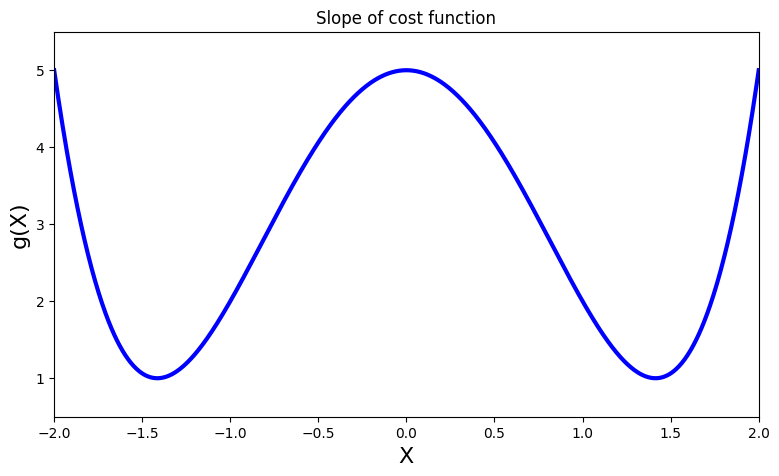

In [8]:
# superimpose gradient descent on Cost function plot and slope of the cost function
plt.figure(figsize=[20,5])


# First chart: Cost function
plt.subplot(1, 2, 1)
plt.title("Slope of cost function")
plt.xlim([-2,2])
plt.ylim([.5, 5.5])
plt.xlabel("X", fontsize=16)
plt.ylabel("g(X)", fontsize=16)
plt.plot(x_values, g(x_values), color="blue", linewidth=3)

np_x_values = np.array(x_values)
# plt.scatter(x_values, cost_func_1(np_x_values), color="red", s=100, alpha=0.6)

# Second chart of the derivative
plt.subplot(1,2,2)
plt.title("Slope of cost function")
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(X)", fontsize=16)
plt.plot(x_values, dg(x_values), color="skyblue", linewidth=5)

# plt.scatter(x_values, slopes, color="red", s=100, alpha=0.6)

# Third chart of the gradient descent
# plt.subplot(1,3,3)
# plt.title("Gradient Descent")
# plt.grid()
# plt.xlim([-.55,.2])
# plt.ylim([-.2,.8])
# plt.xlabel("X", fontsize=16)
# plt.ylabel("df(X)", fontsize=16)
# plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)

plt.scatter(x_values, slopes, color="red", s=100, alpha=0.6)

plt.show()